<a href="https://colab.research.google.com/github/Chris-Embs/Economic-Impact-of-Higher-Education-/blob/main/Economic_Impact_of_Higher_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project - Aadit Mehrotra, Chris Embs, Eva Roytburg, Rhett Burnham**


**Introduction**

In a world inundated with Elon Musks, Mark Zuckerbergs and other successful dropout stories, many young adults have begun to ask themselves: is higher education worth it? College tuition for both private and public schools has risen by a startling 74% in the last 20 years, with some schools raising tuition by over 100% in that same time frame (State Science and Technology Institute). College has become a luxury good, or a way for the rich to maintain their class status: the average price of private school now is $43,505, while public schools cost approximately $24,000 out of state and $11,000 in state (U.S. News and World Report). These exorbitant costs present challenges to many lower and middle-class families, who struggle through federal bureaucracy and take on loans to manage the costs.


Yet, higher education, by economists’ standards, is supposed to represent a public good, accessible to all as a means for greater economic mobility. Indeed, studies indicate that those who attain a bachelor’s degree have an opportunity to earn almost $1 million more in lifetime earnings than those who simply graduate high school (Tamborini). However, for Black Americans, this skills premium is less significant: Black individuals with a bachelor’s degree are likely to earn only 67% more than those with a high school diploma over a lifetime.  In the most technologically advanced economy in the history of the world, Americans rightly ask: why don’t we lower barriers to accessibility for higher education? And, with such exorbitant costs, is a college or even graduate degree still worth it? Our project seeks to answer these pressing questions. We decided to test the effect of different levels of education on wages, particularly, wages for Black people. One regression tests for variation in hourly wages for Black people among all industries, while another specifies wages by industry. Additionally, in both of these regressions, we tested two personal demographic factors: age (a statistic significantly positively correlated with wage) and gender (a statistic that is, controversially, also associated with wage). For the second regression, we also decided to incorporate a variable that accounted for welfare distribution – which is highly contested among some political circles – to see what effect that would have on wages for Black individuals.

We were also interested in assessing how local contexts interact with demographic factors, such as race, age, and gender. Georgia is highly economically segregated; in South Georgia, two-thirds of the residents live at or below the poverty line, while those residing in the Atlanta metro area on average earn a $74,000 salary (Hayslett). Many of the areas in South Georgia that are on average, the poorest, are also Black-majority; and so, we wanted to test whether there was a regional disparity in wage outcomes for Black individuals. Our overarching question became, what factors -- particularly, educational ones -- contribute to differences in hourly wages, and to what extent can they explain wage variation?

**Literature Review**

In the U.S., the skills premium—the wage gap between people who attend higher education versus those who don’t—is incredibly high. There are substantial differences in earnings over a lifetime based on educational attainment. The Social Security Administration found that men who graduated from college earn $900,000 more in median lifetime earnings than those who graduated from high school only, while women earn about $630,000 more. The earnings multiply on a graduate level; men with graduate degrees earn $1.5 million more in median lifetime earnings than high school graduates, while women with graduate degrees earn $1.1 million more (Tamborini et al., 2015).

For Black individuals, this skills premium still exists, but it is less pronounced. Black individuals with a bachelor’s degree are likely to earn 67% more than those with a high school diploma over a lifetime ($1.36M for a high school diploma versus $2.27M for a bachelor’s degree). This is in comparison to Asian adults, who experience an estimated 114% increase in earnings from a high school diploma to a bachelor’s degree, while lifetime earnings for White adults increase by 74% (Georgetown University Center on Education and the Workforce, 2021).

Good quality education acts as an equalizer and leveler between classes in society. Studies indicate that even in countries with persistent and rising inequality, education is the one factor that can unstick the situation, creating and supplying demand for better jobs and raising incomes for the poorest people. A 2021 study co-published by Stanford and Munich’s Ludwig Maximillian University shows that, between 1960 and 2000, 75% of the growth in GDP around the world was linked to increased math and science skills (Spada et al., 2023).

Georgia is incredibly economically striated, with South Georgia containing some of the poorest counties in the nation. Of the 88 counties in the region of South Georgia, 73 fell into the bottom national quartile for poverty; this means that roughly two-thirds of South Georgian residents are impoverished. Meanwhile, the Atlanta metro area is economically thriving (Hayslett, 2024).

Cost is the number one barrier to education, and in the past 20 years, tuition for both private and public schools has risen by 84%. Prices have been steadily hiking for years due to a number of factors, including increasing salaries for professors, an exponential increase in the number of bureaucratic hires, increased investments in technology and infrastructure, and inflation. This has made higher education much less accessible to low-income students (State Science and Technology Institute, 2018).

There are significant disparities in college affordability, particularly affecting students from low-income backgrounds and students of color. A study from the Institute for Higher Education Policy reveals that 90% of Pell Grant recipients experience unmet financial need, compared to 56% of non-recipients. Black students, in particular, face the highest average unmet need among all racial and ethnic groups, with about a $9,000 gap between college costs and what students can cover through grant aid and family contributions. This contributes to higher dropout rates among Black students (Institute for Higher Education Policy, n.d.).

Even with financial aid, most families struggle to pay for tuition out-of-pocket and need to take out loans. Loans are one of the largest barriers to educational access. U.S. News & World Report provides up-to-date statistics on the price of private and public colleges, indicating the financial burden of higher education (U.S. News & World Report, n.d.).


# Importing Data

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from IPython.display import display, HTML
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing IMPUS USA
df = pd.read_csv("usa_00007.csv")

## Data cleaning
For data cleaning we first filter for only counties in the atlanta metro area, in the manipulation section we will change this variable to be categorical to be switched to a dummy for the regression, We then filter for only black and white people. We create the binary dummy variable minority 1: African American, 0: non Hispanic White. Next we insure the income is below $900,000 and above $0. Similar to minority variable be make an is female variable. Then we create an is married according to IMPUS USA codes, either married or not. We set CLASSWKR variable equal to 1 so that all sample are employed. Then we ensure that the hours worked weekly are above 1. Finally we change it so that our highest age is 70, which is very close to the average retirement age.

In [ ]:
# We are choosing only white and african americans form these coutnies
atlanta_counties = [570, 670, 970, 1130, 1210, 1170, 630, 1510, 890]
df_new = df[df['COUNTYICP'].isin(atlanta_counties) & df['RACE'].isin([1, 2])].copy()

# filtering for counties
# 7860: Elementary and secondary schools
# 7870: Colleges and universities, including junior colleges
# 8680: Restaurants and other food services
# 0770: Construction

# df_new = df_new[df_new['IND'].isin([7860, 8680, 7870, 770])] # isolating for only most popular industires

# 1 = minority 0 = white non hispanic
df_new['minority'] = df_new['RACE'].map({1: 0, 2: 1}).astype(int)

# remove outliers for income
df_new = df_new[df_new['INCWAGE'] < 900000]
df_new = df_new[df_new['INCWAGE'] > 0]
# binary for gender 1= woman
df_new['is_female'] = df_new['SEX'].map({1: 0, 2: 1})
# binary for married
df_new['is_married'] = df_new['MARST'].apply(lambda x: 1 if x in [1, 2] else 0)
# income from welfare to a decimal
df_new['INCWELFR'] = df_new['INCWELFR'].astype(float)

# dont want someone working 0 hours, wont be able to calc wage
df_new = df_new[df_new['UHRSWORK'] > 0]
# Limit age to max 50
df_new = df_new[df_new['AGE'] <= 70]


# drop missing values
cols_to_check = ['EDUCD', 'AGE', 'SEX', 'MARST', 'INCWELFR', 'CLASSWKR', 'UHRSWORK', 'INCWAGE']
df_new = df_new.dropna(subset=cols_to_check)

## Data Manipulation
We create our wage variable dividing the income by estimated hours worked in a year. Then using the IMPUS USA codes we create a categorical education_level variable ranging from less than highschool diploma to graduate (making this a dummies after). In a similar way we make a dummy for the 4 most popular industry types and the counties that we filtered for. For each of these dummies we create an interaction term with minorities and make sure not to drop any of the categories when creating the dummies. This is because now non minority serves as the reference for all interaction regressors later.


In [ ]:


# Reset index after filtering
df_new = df_new.reset_index(drop=True)
# Creating the dependent
df_new['wage_per_hour'] = (df_new['INCWAGE'] / 52) / df_new['UHRSWORK']
# Recode education levels (do not drop any levels)
def recode_education(educd):
    if educd <= 61:
        return 'Less_than_HS'
    elif educd <= 64:
        return 'HS_grad'
    elif educd < 101:
        return 'Some_college'
    elif educd == 101:
        return 'Bachelors'
    else:
        return 'Graduate'

df_new['Education_Level'] = df_new['EDUCD'].apply(recode_education)
education_dummies = pd.get_dummies(df_new['Education_Level'], drop_first=False)
df_new = pd.concat([df_new, education_dummies], axis=1)


# Create interaction terms between 'dummy_black' and education dummies
for educ_level in education_dummies.columns:
    df_new[educ_level + '_minority'] = df_new[educ_level] * df_new['minority']
# Prepare the list of interaction variables
education_black_vars = [level + '_minority' for level in education_dummies.columns]
# Convert columns to integer type if necessary
columns_to_convert = education_dummies.columns.tolist() + education_black_vars
df_new[columns_to_convert] = df_new[columns_to_convert].astype(int)


# FOR INDUSTRY REGRESSION
def recode_industry(ind):
    if ind == 7860:
        return 'Elementary_Secondary_Schools'
    elif ind == 7870:
        return 'Colleges_Universities'
    elif ind == 8680:
        return 'Restaurants_Food_Services'
    elif ind == 770:
        return 'Construction'


df_new['Industry_Category'] = df_new['IND'].apply(recode_industry)
industry_dummies = pd.get_dummies(df_new['Industry_Category'], prefix='Industry', drop_first=False)
df_new = pd.concat([df_new, industry_dummies], axis=1)

industry_dummy_names = industry_dummies.columns.tolist()

for industry in industry_dummy_names:
    df_new[industry + '_minority'] = df_new[industry] * df_new['minority']

industry_minority_vars = [industry + '_minority' for industry in industry_dummy_names]
columns_to_convert = industry_dummy_names + industry_minority_vars
df_new[columns_to_convert] = df_new[columns_to_convert].astype(int)


# county dummy
county_mapping = {
    570: "Cherokee", 670: "Cobb", 970: "Douglas", 1130: "Fayette",
    1210: "Fulton", 1170: "Forsyth", 890: "DeKalb",
    630: "Clayton", 1510: "Henry"
}
df_new['COUNTY'] = df_new['COUNTYICP'].map(county_mapping)

# Create county dummy variables
county_dummies = pd.get_dummies(df_new['COUNTY'], prefix='county', drop_first=False)
df_new = pd.concat([df_new, county_dummies], axis=1)

# Create interaction terms between 'dummy_black' and county dummies
for county_col in county_dummies.columns:
    df_new[county_col + '_minority'] = df_new[county_col] * df_new['minority']

# Prepare the list of interaction variables
county_black_vars = [county_col + '_minority' for county_col in county_dummies.columns]

# Convert columns to integer type
columns_to_convert = list(education_dummies.columns) + county_black_vars
df_new[columns_to_convert] = df_new[columns_to_convert].astype(int)


# DATA DESCRIPTION

In [ ]:
# columns to exclude

columns_to_exclude = [
    "Education_Level", "EDUC", "EDUCD","CLASSWKRD", "SAMPLE", "SERIAL", "CBSERIAL",
    "HHWT", "CLUSTER", "STATEICP", "COUNTYICP", "STRATA",
    "GQ", "PERNUM", "PERWT", "SEX", "YEAR", "RACE", "RACED", "MARST"
]


df_describe = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]
display(df_new.info())
df_describe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6584 entries, 0 to 6583
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   YEAR                                            6584 non-null   int64  
 1   STATEICP                                        6584 non-null   int64  
 2   COUNTYICP                                       6584 non-null   int64  
 3   SEX                                             6584 non-null   int64  
 4   AGE                                             6584 non-null   int64  
 5   MARST                                           6584 non-null   int64  
 6   RACE                                            6584 non-null   int64  
 7   RACED                                           6584 non-null   int64  
 8   EDUC                                            6584 non-null   int64  
 9   EDUCD                                    

None

,AGE,CLASSWKR,IND,UHRSWORK,INCWAGE,INCWELFR,minority,is_female,is_married,wage_per_hour,...,Industry_Restaurants_Food_Services,Industry_Colleges_Universities_minority,Industry_Construction_minority,Industry_Elementary_Secondary_Schools_minority,Industry_Restaurants_Food_Services_minority,county_Cobb_minority,county_DeKalb_minority,county_Douglas_minority,county_Fayette_minority,county_Forsyth_minority
count,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,...,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000
mean,42.217649,1.956106,6574.487849,38.154010,53197.114216,36.251519,0.126519,0.496507,0.519745,25.258420,...,0.062424,0.003341,0.002734,0.008809,0.010328,0.041616,0.000608,0.067740,0.002886,0.013670
std,14.517555,0.204875,2562.631484,12.300208,60441.404917,559.595388,0.332458,0.500026,0.499648,27.473643,...,0.241943,0.057713,0.052219,0.093450,0.101109,0.199725,0.024643,0.251318,0.053646,0.116124
min,16.000000,1.000000,170.000000,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.123274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,5070.000000,35.000000,16800.000000,0.000000,0.000000,0.000000,0.000000,9.974849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,2.000000,7590.000000,40.000000,39000.000000,0.000000,0.000000,0.000000,1.000000,19.230769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,2.000000,8290.000000,40.000000,70000.000000,0.000000,0.000000,1.000000,1.000000,32.211538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,2.000000,9870.000000,99.000000,565000.000000,18900.000000,1.000000,1.000000,1.000000,673.076923,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset offers summary statistics for demographic, income, and industry-related factors, among other variables. The average age (`AGE`) for continuous variables ranges from 17 to 70 years, roughly 50 years. Usually working 40 hours a week (`UHRSWORK,` people vary in their hours between 1 and 99. While welfare income (`INCWELFR`) averages $17.80, some people receive up to $10,000; income from wages (`INCWAGE`) exhibits great variance with a mean of $71,522 and a maximum of $565,000. Though the hourly pay, or `wage_per_hour,` averages $34.79, the high standard deviation and maximum value of $1,086 point to notable differences.



Binary variables record categories and demographic data. About 33.7% of people are female (`is_female,` 72.2% are married (`is_married,` and the mean for `minority` shows that a small fraction of the sample consists of minority groups. Variables particular to each industry, including `Industry_Elementary_Secondary_Schools_minority` and `Industry_Restaurants_Food_Services_minority,` show the percentage of people working in these sectors and whether they are minorities. Likewise, county-level variables such as `county_Cobb_minority` show the percentage of minorities in particular counties; Cobb County has 2.9% minorities, whereas DeKalb County boasts 0.1%.



All things considered, the dataset shows substantial variation in earnings, labor hours, and income across several demographic and geographic groupings, therefore offering a rich basis for additional statistical study, especially regarding the influence of these characteristics on wages.

In [ ]:
# store df_new in dataframe 'df'
df = df_new

# Select numerical variables
numerical_vars = [
    'AGE', 'INCWAGE', 'wage_per_hour', 'UHRSWORK',
    'is_female', 'is_married', 'minority', 'Bachelors', 'Graduate', 'HS_grad'
]

# Filter the dataframe
correlation_data = df[numerical_vars]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()



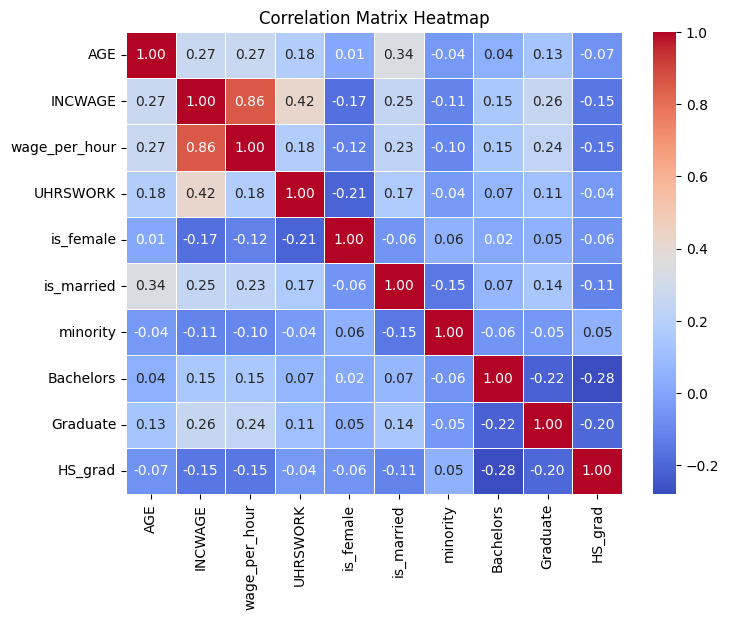

In [ ]:


# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title("Correlation Matrix Heatmap")
plt.show()

The heat map displays the correlation matrix for numerous variables, therefore showing correlations between demographic and educational elements and measures linked to wages. INCWAGE and wage_per_hour show a very high positive correlation (0.76), meaning hourly pay is closely correlated with total income. By contrast, minority suggests wage differences and an age composition skew by negatively associating with wage_per_ hour (-0.07) and AGE (-0.07). Other factors, such as is_married and AGE, show a modestly positive correlation (0.15), meaning older people are more likely to be married.

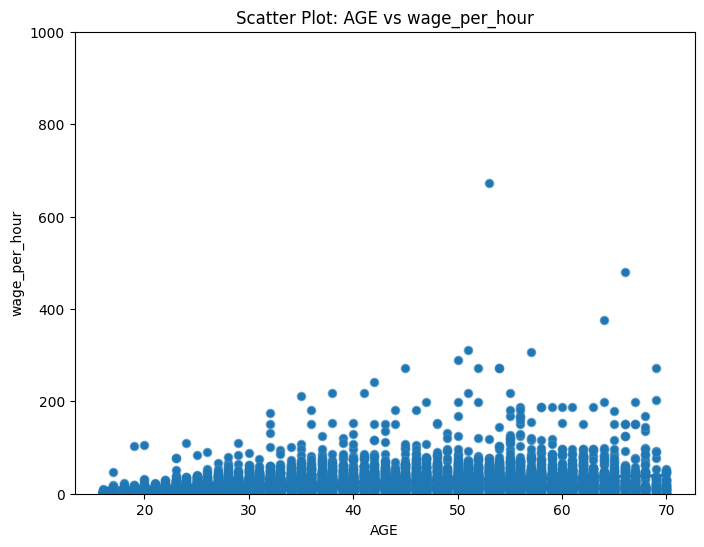

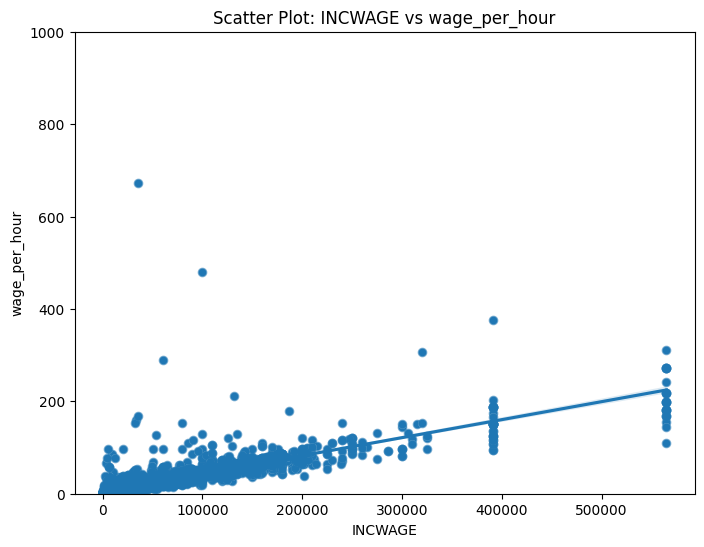

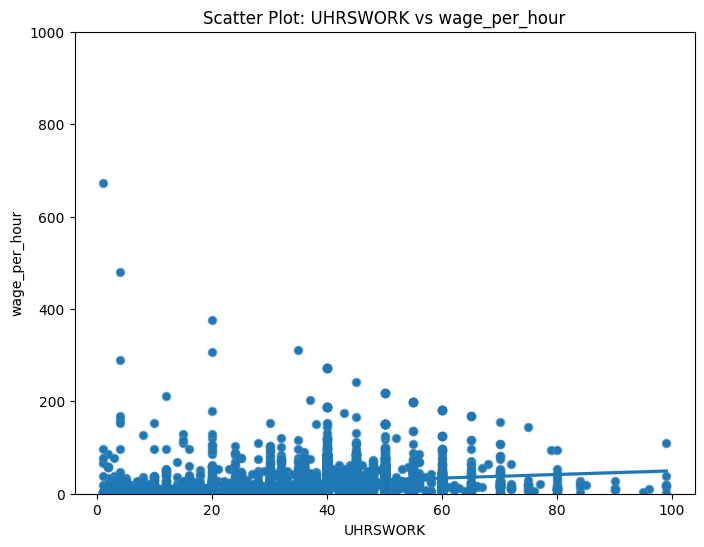

In [ ]:
#set wage to 'wage_per_hour'
wage = 'wage_per_hour'

# list variables for loop
continuous_vars = ['AGE', 'INCWAGE', 'UHRSWORK']

# Loop through each to make scatter
for var in continuous_vars:
    plt.figure(figsize=(8, 6))

    # Create scatter
    sns.scatterplot(data=df, x=var, y=wage)

    # Add labels
    plt.title(f"Scatter Plot: {var} vs {wage}")
    plt.xlabel(var)
    plt.ylabel(wage)

    sns.regplot(data=df, x=var, y=wage, scatter_kws={'alpha': 0.5})

    # Set y limit
    plt.ylim(0, 1000)
    plt.show()


Graph 1: The scatter plot shows the link between "AGE" and "wage_per_hour," with a rising trend suggesting that hourly compensation increases with age. Still, the link is weak, as shown by the scattered points and the minor trend line slope. Few significant cases exist whereby some people earn more regardless of age. Generally speaking, lower income levels define most data points for any age group. The regression will examine this observed trend further, using "AGE" as an independent variable to evaluate its statistical relevance and effect on hourly pay.

Graph 2: INCWAGE (total income) and wage_per_hour clearly have a positive link, as seen by the strong trend line and point clustering of the scatter plot. Since most data points fall in the lower income spectrum, higher total income is quite closely correlated with hourly compensation.



Graph 3: It shows the relationship between "wage_per_hour" and "UHRSWORK," or hours worked." The scatter plot demonstrates the relationship between UHRSWORK (hours worked) and pay_per_hour. A slight positive trend indicates that hourly wages climb modestly with more hours worked. Most data points center on lower salary levels and regular working hours (20–50 weekly).

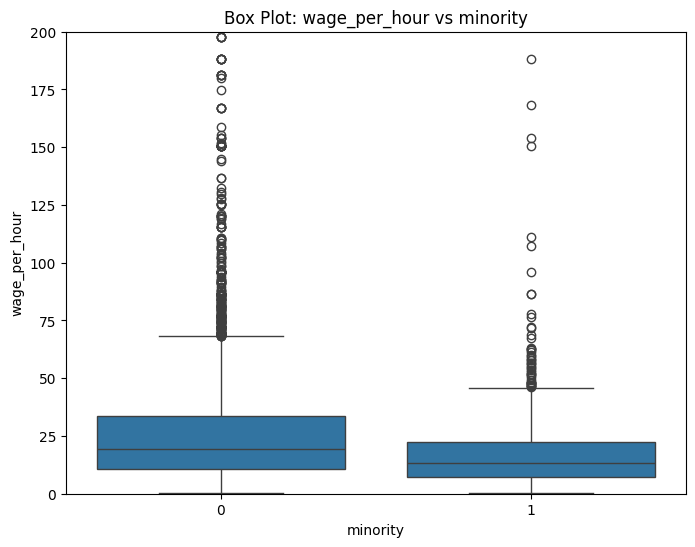

In [ ]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='minority', y='wage_per_hour')

# labels
plt.title(f"Box Plot: {'wage_per_hour'} vs {'minority'}")
plt.xlabel('minority')
plt.ylabel('wage_per_hour')

# Set y limit
plt.ylim(0, 200)

# Show
plt.show()

The box plot contrasts the wage_per__hour distribution between groups—minority (African-American community) (1) and non-minority (0). Although many non-minority people have outlays at higher pay levels, they generally have greater median wages and a wider range. With fewer outliers in the high range, minority groups show lower incomes generally. The regression study will investigate this gap, including minority as an independent variable to measure its impact on hourly wages while adjusting for other aspects.

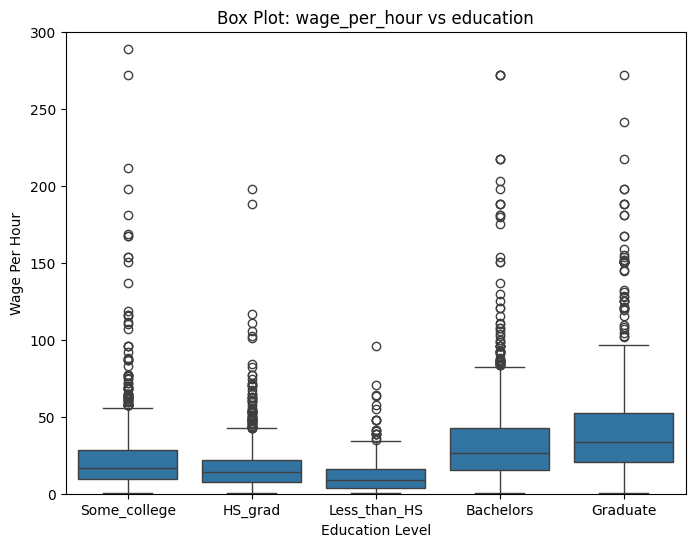

In [ ]:
# Create  box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Education_Level', y='wage_per_hour')

# Add labels
plt.title(f"Box Plot: {'wage_per_hour'} vs {'education'}")
plt.xlabel('Education Level')
plt.ylabel('Wage Per Hour')

# Set y limit
plt.ylim(0, 300)

# Show the plot
plt.show()

Individuals with higher education, such as a "Graduate" or "Bachelor," typically receive higher earnings, as shown by the box plot that shows the link between "wage_per_hour" and different education levels. Those with 'Some_college,' 'HS_grad,' or 'Less_than_HS' education levels have lower median salaries and fewer extreme earners. To quantify the influence of education levels on hourly earnings while controlling for other characteristics, we will conduct more analysis in the regression, but this pattern suggests that education significantly affects wages.

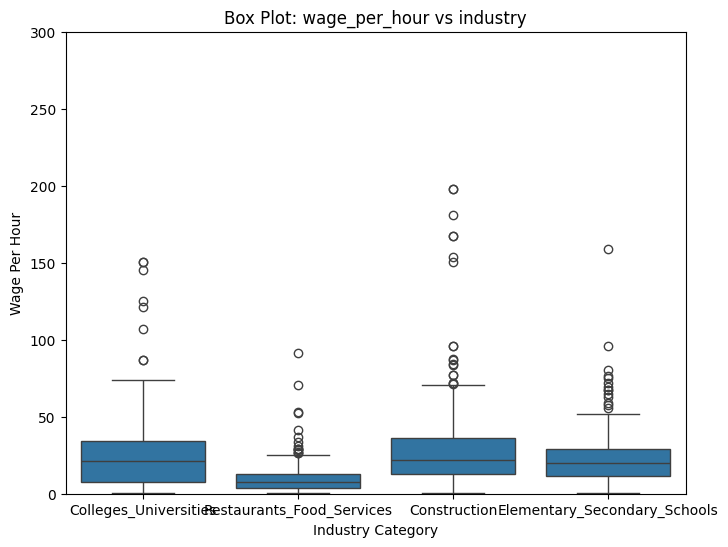

In [ ]:

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Industry_Category', y='wage_per_hour')

# Add labels and title
plt.title(f"Box Plot: {'wage_per_hour'} vs {'industry'}")
plt.xlabel('Industry Category')
plt.ylabel('Wage Per Hour')

# Set y-axis limit
plt.ylim(0, 300)

# Show the plot
plt.show()

With Construction displaying the most wage variability and more outliers at higher pay levels, the box plot emphasizes the distribution of wage_per_hour across many sectors. Lower median earnings and more limited distributions abound in sectors including Restaurants_Food_Services, Elementary_Secondary_Schools, and `Collegues_ Universities. These variations imply that industry influences hourly earnings significantly; this will be investigated in the regression analysis by including industry as a categorical variable to measure its impact while adjusting for other variables.

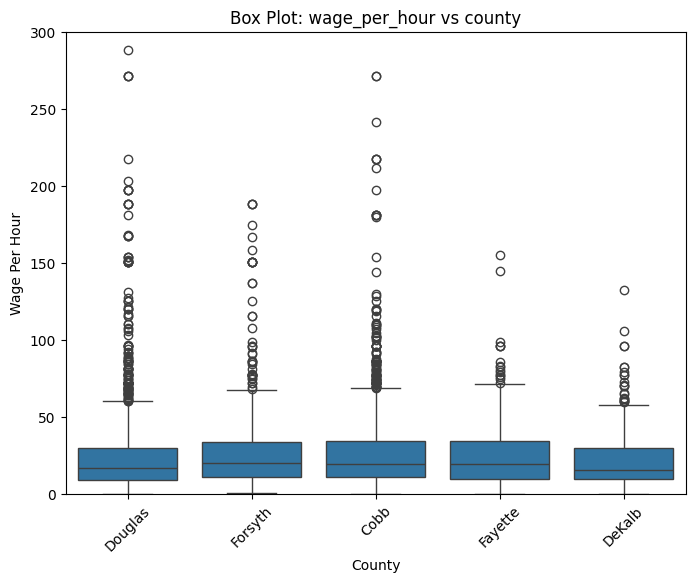

In [ ]:
#box plot for counties
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='COUNTY', y='wage_per_hour')

# Add labels and title
plt.title("Box Plot: wage_per_hour vs county")
plt.xlabel('County')
plt.ylabel('Wage Per Hour')
# Set y-axis limit
plt.ylim(0, 300)

# Rotate x-axis y
plt.xticks(rotation=45)

# Show the plot
plt.show()

With similar median wages shown for most counties, the box plot displays the variation of wage_per_ hour across many counties. To indicate increased pay variability, some counties—like Fulton—show more outliers at higher pay levels and a more broad pay range. These regional differences imply that geography can affect hourly wages, so the regression analysis will include counties as categorical variables to measure their particular effects on wages while considering other elements.

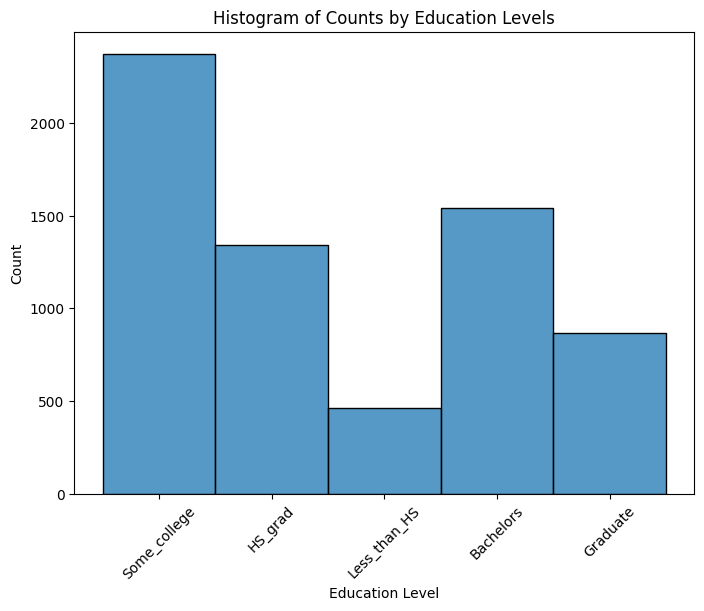

In [ ]:



# Define the variable for education levels and plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Education_Level', discrete=True)

# Add labels and title
plt.title("Histogram of Counts by Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")

# Rotate x-axis
plt.xticks(rotation=45)

# Show the plot
plt.show()


The histogram shows the distribution of numbers among several educational levels. While the lowest count is among those with "Less than High School," persons with "Some College" education have the highest frequency followed by "Bachelors" and "High School Graduates." This distribution emphasizes the range of the dataset's educational degrees. These educational levels will be included as factors in the forthcoming regression study to assess how they affect salaries and other economic results.

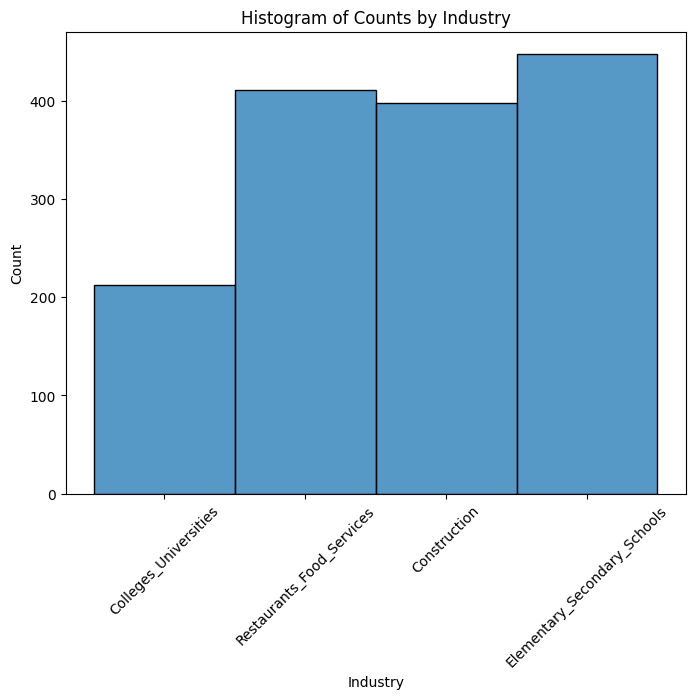

In [ ]:

# plot industry_category
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Industry_Category', discrete=True)

# Add labels and title
plt.title("Histogram of Counts by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")

# Rotate x-axis
plt.xticks(rotation=45)

# Show the plot
plt.show()

The histogram displays people's distribution across several sectors; most are classified as "Other" and then "Construction." More minor counts are noted for industries including "Elementary Secondary Schools" and "Restaurants Food Services." This pattern points to most employees falling into either broad or unclassified groups. These sectors will be included as definite factors in the forthcoming regression analysis to investigate their influence on wages and economic results.

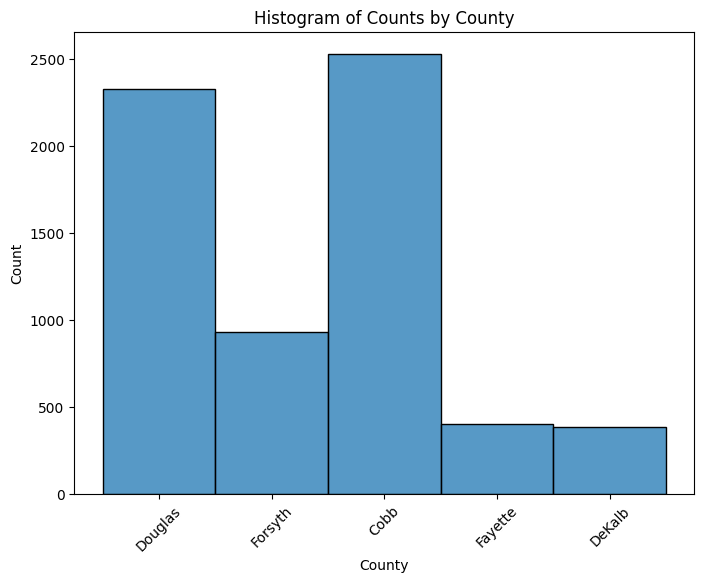

In [ ]:
# Plot counties
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='COUNTY', discrete=True)

# Add labels and title
plt.title("Histogram of Counts by County")
plt.xlabel("County")
plt.ylabel("Count")

# Rotate x-axis
plt.xticks(rotation=45)

# Show the plot
plt.show()

The histogram depicts the distribution of people throughout several counties, with Douglas and Cobb counties having the most representation, followed by Forsyth, DeKalb, and Fayette counties. This unequal distribution draws attention to the dataset's geographic variance. Counties will be added as definite factors in the forthcoming regression study to evaluate how location affects wages and other economic results.


In [ ]:

X = pd.concat([
    df_new[['AGE', 'is_female', 'is_married','minority']],
    df_new[education_black_vars]
], axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(X)
# Dependent variable
y = df_new['wage_per_hour']

# Ensure X and y have the same length and aligned indices
print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Check for missing values
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

# Drop any rows with missing values in X or y (if any)
combined = pd.concat([X, y], axis=1)
combined = combined.dropna()

# Separate X and y again
X = combined.drop('wage_per_hour', axis=1)
y = combined['wage_per_hour']

# Ensure X and y have the same length after dropping missing values
print("Shape of X after dropping missing values:", X.shape)
print("Length of y after dropping missing values:", len(y))

Shape of X: (6584, 10)
Length of y: 6584
Missing values in X: const                    0
AGE                      0
is_female                0
is_married               0
minority                 0
Bachelors_minority       0
Graduate_minority        0
HS_grad_minority         0
Less_than_HS_minority    0
Some_college_minority    0
dtype: int64
Missing values in y: 0
Shape of X after dropping missing values: (6584, 10)
Length of y after dropping missing values: 6584


#Methods -- for regressions
Regression 1
For this regression we included the gender, age and marital status for overall better fitness in the regression (showing in R^2). This regression inspect the education level interaction term with minorities. The coefficient for each of the regressor hypotheses will be negative, indicative of racial disparity. It is important to note that the minority coefficient will be added in addition, assuming the person is black. We hypothesis this will also be negative


Regression 2
For this regression we are looking at the interaction term of industry and minority. These are the most popular lines of work. With these being school related along with food and construction, we imagine there will be disparity (negative coefficient compared to the white reference group for each dummy).We add age and gender for better fit and interpretabiltiy.

Regression 3
For this regression we look at the interaction term of county and minority. We hypothesize that the south east regions, those which have been most impacted by racial capitalism will have higher levels of disparities, or at least coefficients with higher magnitudes. Again we include AGE, and Gender to have more interpretability and a higher R^2. We hypothesize that due to this regression being based on location alone the R^2 will be small but the p-values may show significance for some locations.


### Regression 1

**Model:**

$$
\text{Dependent Variable} = \beta_0 + \beta_1 (\text{AGE}) + \beta_2 (\text{is_female}) + \beta_3 (\text{Industry_Colleges\Universities\_minority}) + \beta_4 (\text{Industry_Construction_minority}) + \beta_5 (\text{Industry_Elementary_Secondary_Schools_minority}) + \beta_6 (\text{Industry_Restaurants_Food_Services_minority}) + \epsilon
$$


In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          wage_per_hour   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          2.19e-168
Time:                        23:02:45   Log-Likelihood:                -30753.
No. Observations:                6584   AIC:                         6.152e+04
Df Residuals:                    6575   BIC:                         6.159e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.82

In [ ]:
# Define hypotheses for the industry regression
hypotheses = ['AGE = 0', 'is_female = 0'] + [f'{var} = 0' for var in industry_minority_vars]

# Perform regression with default variance-covariance matrix
results_default = reg.fit()
ftest_default = results_default.f_test(hypotheses)
fstat_default = ftest_default.statistic
fpval_default = ftest_default.pvalue
print(f'fstat_default: {fstat_default}\n')
print(f'fpval_default: {fpval_default}\n')

# Perform regression with HC3 (Refined White)
results_hc3 = reg.fit(cov_type='HC3')
ftest_hc3 = results_hc3.f_test(hypotheses)
fstat_hc3 = ftest_hc3.statistic
fpval_hc3 = ftest_hc3.pvalue
print(f'fstat_hc3: {fstat_hc3}\n')
print(f'fpval_hc3: {fpval_hc3}\n')

# Perform regression with HC0 (Classical White)
results_hc0 = reg.fit(cov_type='HC0')
ftest_hc0 = results_hc0.f_test(hypotheses)
fstat_hc0 = ftest_hc0.statistic
fpval_hc0 = ftest_hc0.pvalue
print(f'fstat_hc0: {fstat_hc0}\n')


NameError: name 'reg' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

coefficients = [4.5993, 0.6507, -9.3969, 5.2136, 8.7966, -7.6988, 86.8603, -26.0019, -24.3799, -19.9831]
std_errors = [6.503, 0.122, 3.103, 3.340, 5.256, 11.838, 11.779, 10.853, 16.159, 9.162]
p_values = ['', '***', '**', '', '*', '', '***', '**', '', '*']
labels = [
    'const',
    'AGE',
    'is_female',
    'is_married',
    'minority',
    'Bachelors_minority',
    'Graduate_minority',
    'HS_grad_minority',
    'Less_than_HS_minority',
    'Some_college_minority'
]



# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Coefficients': coefficients,
    'Std_Errors': std_errors,
    'Variables': labels,
    'Significance': p_values
})



# Reverse the DataFrame for better visualization (optional)
plot_df = plot_df.iloc[::-1].reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

# Create the bar plot without error bars
ax = sns.barplot(
    x='Coefficients',
    y='Variables',
    data=plot_df,
    palette="viridis",
    orient='h'
)

# Add error bars manually using plt.errorbar
for i, (coef, std_err) in enumerate(zip(plot_df['Coefficients'], plot_df['Std_Errors'])):
    plt.errorbar(
        x=coef,
        y=i,
        xerr=std_err,
        fmt='none',
        ecolor='black',
        capsize=5
    )

# Add significance levels
for i, (coef, sig) in enumerate(zip(plot_df['Coefficients'], plot_df['Significance'])):
    if sig:
        plt.text(
            coef + np.sign(coef) * 0.2,
            i,
            sig,
            va='center',
            fontweight='bold'
        )

plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


WorkSource Atlanta
GED Preparation:  WorkSource Atlanta
Career Training: ATL Works
CareerReady ATL
Apprenticeship Programs: United Way Atlanta
Urban League of Greater Atlanta
Pathways to Empowerment (P2E): Ulgatl
Atlanta GLOW's Work Ready Program
ages 16-25, who face barriers to education, training, and employment by: Atlanta Glow

### Regression 2

**Model:**

$$
\text{Wage} = \beta_0 + \beta_1 (\text{AGE}) + \beta_2 (\text{is_female}) + \beta_3 (\text{county_Cherokee_minority}) + \beta_4 (\text{county_Clayton_minority}) + \beta_5 (\text{county_Cobb_minority}) + \beta_6 (\text{county_DeKalb_minority}) + \beta_7 (\text{county_Douglas_minority}) + \beta_8 (\text{county_Fayette_minority}) + \beta_9 (\text{county_Forsyth_minority}) + \beta_{10} (\text{county_Fulton_minority}) + \beta_{11} (\text{county_Henry_minority}) + \epsilon
$$


In [ ]:
# REGRESSION ON INDUSTRY
df_industry = df_new[df_new['IND'].isin([7860, 8680, 7870, 770])]
X = pd.concat([
    df_industry[['AGE', 'is_female']],
    df_industry[industry_minority_vars]
], axis=1)

X = sm.add_constant(X)
y = df_industry['wage_per_hour']

#aligned indices
print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

combined = pd.concat([X, y], axis=1)
combined = combined.dropna()

X = combined.drop('wage_per_hour', axis=1)
y = combined['wage_per_hour']

print("Shape of X after dropping missing values:", X.shape)
print("Length of y after dropping missing values:", len(y))

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

In [ ]:
# Define hypotheses for the industry regression
hypotheses = ['AGE = 0', 'is_female = 0'] + [f'{var} = 0' for var in industry_minority_vars]

# Perform regression with default variance-covariance matrix
results_default = reg.fit()
ftest_default = results_default.f_test(hypotheses)
fstat_default = ftest_default.statistic
fpval_default = ftest_default.pvalue
print(f'fstat_default: {fstat_default}\n')
print(f'fpval_default: {fpval_default}\n')

# Perform regression with HC3 (Refined White)
results_hc3 = reg.fit(cov_type='HC3')
ftest_hc3 = results_hc3.f_test(hypotheses)
fstat_hc3 = ftest_hc3.statistic
fpval_hc3 = ftest_hc3.pvalue
print(f'fstat_hc3: {fstat_hc3}\n')
print(f'fpval_hc3: {fpval_hc3}\n')

# Perform regression with HC0 (Classical White)
results_hc0 = reg.fit(cov_type='HC0')
ftest_hc0 = results_hc0.f_test(hypotheses)
fstat_hc0 = ftest_hc0.statistic
fpval_hc0 = ftest_hc0.pvalue
print(f'fstat_hc0: {fstat_hc0}\n')


In [ ]:
coefficients = [13.4990, 0.3306, -7.0864, -16.6434, 1.3963, -15.3296, 6.1146]
std_errors = [4.123, 0.081, 2.576, 22.734, 5.231, 32.126, 14.442]
p_values = ['**', '***', '**', '', '', '', '']
labels = [
    'const',
    'AGE',
    'is_female',
    'Industry_Colleges_Universities_minority',
    'Industry_Construction_minority',
    'Industry_Elementary_Secondary_Schools_minority',
    'Industry_Restaurants_Food_Services_minority'
]



# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Coefficients': coefficients,
    'Std_Errors': std_errors,
    'Variables': labels,  # Use the correct variable name
    'Significance': p_values  # Use the correct variable name
})

# Reverse the DataFrame for better visualization (optional)
plot_df = plot_df.iloc[::-1].reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

# Create the bar plot without error bars
ax = sns.barplot(
    x='Coefficients',
    y='Variables',
    data=plot_df,
    palette="viridis",
    orient='h'
)

# Add error bars manually using plt.errorbar
for i, (coef, std_err) in enumerate(zip(plot_df['Coefficients'], plot_df['Std_Errors'])):
    plt.errorbar(
        x=coef,
        y=i,
        xerr=std_err,
        fmt='none',
        ecolor='black',
        capsize=5
    )

# Add significance levels
for i, (coef, sig) in enumerate(zip(plot_df['Coefficients'], plot_df['Significance'])):
    if sig:
        plt.text(
            coef + np.sign(coef) * 0.2,
            i,
            sig,
            va='center',
            fontweight='bold'
        )

plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# create the regression

X = pd.concat([
    df_new[[ 'AGE', 'is_female']],
    df_new[county_black_vars]
], axis=1)

X = sm.add_constant(X)
# Dependent
y = df_new['wage_per_hour']

# Ensure X and y have the same length and aligned indices
print("Shape of X:", X.shape)
print("Length of y:", len(y))
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Drop any rows with missing values in X or y
combined = pd.concat([X, y], axis=1)
combined = combined.dropna()

X = combined.drop('wage_per_hour', axis=1)
y = combined['wage_per_hour']

# Ensure X and y have the same length after dropping missing values
print("Shape of X after dropping missing values:", X.shape)
print("Length of y after dropping missing values:", len(y))



### Regression 3

**Model:**

$$
\text{Dependent Variable} = \beta_0 + \beta_1 (\text{AGE}) + \beta_2 (\text{is_female}) + \beta_3 (\text{minority}) + \beta_4 (\text{is_married}) + \beta_5 (\text{Bachelors_minority}) + \beta_6 (\text{Graduate_minority}) + \beta_7 (\text{HS_grad_minority}) + \beta_8 (\text{Less_than_HS_minority}) + \beta_9 (\text{Some_college_minority}) + \epsilon
$$

In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

In [ ]:
# Define hypotheses for the industry regression
hypotheses = ['AGE = 0', 'is_female = 0'] + [f'{var} = 0' for var in education_black_vars]

# Perform regression with default variance-covariance matrix
results_default = reg.fit()
ftest_default = results_default.f_test(hypotheses)
fstat_default = ftest_default.statistic
fpval_default = ftest_default.pvalue
print(f'fstat_default: {fstat_default}\n')
print(f'fpval_default: {fpval_default}\n')

# Perform regression with HC3 (Refined White)
results_hc3 = reg.fit(cov_type='HC3')
ftest_hc3 = results_hc3.f_test(hypotheses)
fstat_hc3 = ftest_hc3.statistic
fpval_hc3 = ftest_hc3.pvalue
print(f'fstat_hc3: {fstat_hc3}\n')
print(f'fpval_hc3: {fpval_hc3}\n')

# Perform regression with HC0 (Classical White)
results_hc0 = reg.fit(cov_type='HC0')
ftest_hc0 = results_hc0.f_test(hypotheses)
fstat_hc0 = ftest_hc0.statistic
fpval_hc0 = ftest_hc0.pvalue
print(f'fstat_hc0: {fstat_hc0}\n')


In [ ]:
coefficients = [5.9550, 0.6972, -9.0872, -7.0317, -2.1053, 56.8878, -12.7412, -13.9451, -11.1029, -5.3980, 5.0814, -14.8576]
std_errors = [6.382, 0.121, 3.103, 14.180, 16.025, 11.080, 24.250, 14.589, 14.257, 24.786, 51.929, 20.893]
p_values = ['', '***', '**', '', '', '***', '', '', '', '', '', '']
labels = [
    'const',
    'AGE',
    'is_female',
    'county_Cherokee_minority',
    'county_Clayton_minority',
    'county_Cobb_minority',
    'county_DeKalb_minority',
    'county_Douglas_minority',
    'county_Fayette_minority',
    'county_Forsyth_minority',
    'county_Fulton_minority',
    'county_Henry_minority'
]




# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Coefficients': coefficients,
    'Std_Errors': std_errors,
    'Variables': labels,  # Use the correct variable name
    'Significance': p_values  # Use the correct variable name
})

# Reverse the DataFrame for better visualization (optional)
plot_df = plot_df.iloc[::-1].reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

# Create the bar plot without error bars
ax = sns.barplot(
    x='Coefficients',
    y='Variables',
    data=plot_df,
    palette="viridis",
    orient='h'
)

# Add error bars manually using plt.errorbar
for i, (coef, std_err) in enumerate(zip(plot_df['Coefficients'], plot_df['Std_Errors'])):
    plt.errorbar(
        x=coef,
        y=i,
        xerr=std_err,
        fmt='none',
        ecolor='black',
        capsize=5
    )

# Add significance levels
for i, (coef, sig) in enumerate(zip(plot_df['Coefficients'], plot_df['Significance'])):
    if sig:
        plt.text(
            coef + np.sign(coef) * 0.2,
            i,
            sig,
            va='center',
            fontweight='bold'
        )

plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusion

This project attempted to determine the effect of educational, demographic, and geographic groups on wages. We were particularly interested in the two categorical variables; education and county-level data, and how these contributed to wage differences. Our results revealed several interesting things:

Demographic factors
Age, as we expected, was statistically significant predictor of wages, with older individuals having higher wages on average
Gender – against our expectations – was not statistically significant in any model, meaning that gender was not determinant of wages
Education
Surprisingly, only a bachelor’s degree had a statistically positive significant effect for minorities, while other degrees were not statistically significant. This could indicate that the return on indication varies depending on contexts, with systemic barriers for to accessing higher educational achievements
Industry Variables
There was a small negative impact on wages for Black people in Colleges and Education.
 In Construction, the coefficient was -5.204. This represents a moderate negative relationship with wages, indicating that Black people in construction might earn lower wages.
Elementary and Secondary Schools : Coefficient = -9.199, which indicates a substantial negative relationship, suggesting Black people in this sector might face significant wage disparities.
 In Res
taurants and Food Services, the coefficient  was a startling -11.937. This negative coefficient is large, meaning that minorities in food services face notable wage disadvantages.
4. County variables
For Black individuals in Cherokee, the coefficient = -7.2949. This suggests a moderate negative impact on wages for black people in Cherokee County
In Clayton, the coefficient is -10.0458. This large negative coefficient implies a notable wage disadvantage for black people in Clayton County, the home of the Hartfield Jackson airport and a place with a large black population.
In Cobb, there is a moderate negative association with wages for minorities.
In Dekalb, the coefficient was -2.2511, which suggests a slight negative effect, but the magnitude is relatively small – which checks, given that Dekalb has a more affluent population.
Both Douglas and Fayette, two metropolition areas around Atlanta, there were moderate wage disadvantages for black people, with a coefficient of -5.263 and -07.2457.  


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df_new[['AGE', 'is_female', 'Industry_Colleges_Universities_minority',
                    'Industry_Construction_minority', 'Industry_Elementary_Secondary_Schools_minority',
                    'Industry_Restaurants_Food_Services_minority']]
# X = pd.DataFrame()
# X['Intercept'] = 1

vif = pd.DataFrame()
vif['variables'] = X.columns
# Calculate VIF for each variable
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

In [ ]:
# !jupyter nbconvert --to html nameoffile.ipynb

#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

References

Tamborini, Christopher R., ChangHwan Kim, and Arthur Sakamoto. 2015. “Education and Lifetime Earnings in the United States.” Demography 52: 1383–1407. https://www.ssa.gov/policy/docs/research-summaries/education-earnings.html

Georgetown University Center on Education and the Workforce. 2021. “The College Payoff: Education, Occupations, Lifetime Earnings.” https://cew.georgetown.edu/cew-reports/collegepayoff2021/#data

Spada, A., Fiore, M., & Galati, A. 2023. “The Impact of Education and Culture on Poverty Reduction: Evidence from Panel Data of European Countries.” Social Indicators Research. doi: 10.1007/s11205-023-03155-0.

Hayslett, C. 2024, June 18. “If it Were a State, South Georgia Might Be the Poorest in the Nation.” Flagpole. https://flagpole.com/news/comment/2024/06/19/if-it-were-a-state-south-georgia-might-be-the-poorest-in-the-nation/

State Science and Technology Institute. 2018, March 14. “Why is the Cost of College Rising So Fast?” https://ssti.org/blog/why-cost-college-rising-so-fast

Institute for Higher Education Policy. n.d. “Pell Grant Recipients and Unmet Need.” https://ihep.org

U.S. News & World Report. n.d. “Paying for College Infographic.” https://www.usnews.com/education/best-colleges/paying-for-college/articles/paying-for-college-infographic
